# **1 - Carregamento dos dados tratados**
---
Nesta etapa é realizada o carregamento dos dados já tratados previamente

In [1]:
import pandas as pd

df = pd.read_csv('dados_tratados.csv')
df.head()

,Cliente_Inativo,Sexo,Aposentado,Casado,Dependentes,Meses_Contrato,Assinatura_Telefone,Assinatura_MultiTelefone,Assinatura_Internet,Assinatura_Seguro_online,...,Assinatura_Seguro_dispositivo,Assinatura_Suporte_tecnico,Assinatura_TV,Assinatura_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Valor_Mensal,Valor_Diario,Valor_Anual
0,0,0,0,0,0,9,0,0,0,0,...,0,0,0,0,0,0,0,65.6,2.186667,593.30
1,0,1,0,1,1,9,0,1,0,0,...,0,1,1,1,1,1,0,59.9,1.996667,542.40
2,1,1,0,1,1,4,0,0,1,0,...,1,1,1,0,1,0,1,73.9,2.463333,280.85
3,1,1,1,0,1,13,0,0,1,0,...,1,1,0,1,1,0,1,98.0,3.266667,1237.85
4,1,0,1,0,1,3,0,0,1,0,...,0,0,0,0,1,0,0,83.9,2.796667,267.40


# **2 - Análise quantitativa dos cancelamentos**
---
A primeira análise a ser realizada é saber o percentual de cancelamento dos clientes. Utilizanda função *value_counts()* conseguimos realizar a contagem de clientes ativos (=0) e inativos (0). Como mostrado abaixo, tem-se que cerca de 26.6% dos clientes pediram cancelamento do plano. Como é um valor significativamente alto, é necessário realizar algumas avaliações dos perfis dos clientes que solicitaram o cancelamento do plano contratado.


In [2]:
print('----------------------------------')
print('Quantidade de clientes ativos (0) e inativos (1)')
print(df.Cliente_Inativo.value_counts())
print('----------------------------------')
print('Quantidade percentual de clientes ativos (0) e inativos (1)')
print(df.Cliente_Inativo.value_counts(normalize=True).map("{:.1%}".format))
print('----------------------------------')

----------------------------------
Quantidade de clientes ativos (No) e inativos (Yes)
0    5163
1    1869
Name: Cliente_Inativo, dtype: int64
----------------------------------
Quantidade percentual de clientes ativos (No) e inativos (Yes)
0    73.4%
1    26.6%
Name: Cliente_Inativo, dtype: object
----------------------------------


# **3 -  Análise correlacional entre os dados**
---
A primeira etapa para a análise será de investigar a relação entre os dados dos clientes como uma forma de identificar o perfil do cliente que pedem cancelamento do plano. Para isto, é utilizada a matriz de correlação para mostrar gráficamente se há correlação entre os dados dos clientes.

Com base no gráfico apresentado abaixo, é possível observar que:

1. Os clientes que possuem ***assinatura de TV*** também tendem a assinar os serviços de ***backup***, ***suporte técnico***, ***internet***, ***seguro online***, ***seguro do dispositivo móvel*** e o de ***filmes.***
2. Em particular, os clientes que assinam os serviços de ***seguro,*** tanto o online quanto o do dispositivo móvel, tendem a preferir pela a optar pela cobrança online.
3. Os clientes que assinam os serviços de telefone, tanto o da linha normal quanto o multi-linha, não apresentam interesse em adquirir os demais serviços
4. O perfil dos clientes inativos indicam uma significativa correlação negativa com o valor anual do plano. Enquanto que apresentam uma correlação positiva com o valor mensal. Este comportamento precisa ser avaliado com mais detalhes.
5. A coluna de clientes inativos apresenta uma correlação negativa com a coluna de ***Meses_Contrato*** que indica o tempo do contrato em meses. Enquanto apresenta uma correlação positiva com a coluna ***dependentes***.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio # Para imprimir e salvar as imagens
from biokit.viz import corrplot # Para a plotagem da matriz de correlação

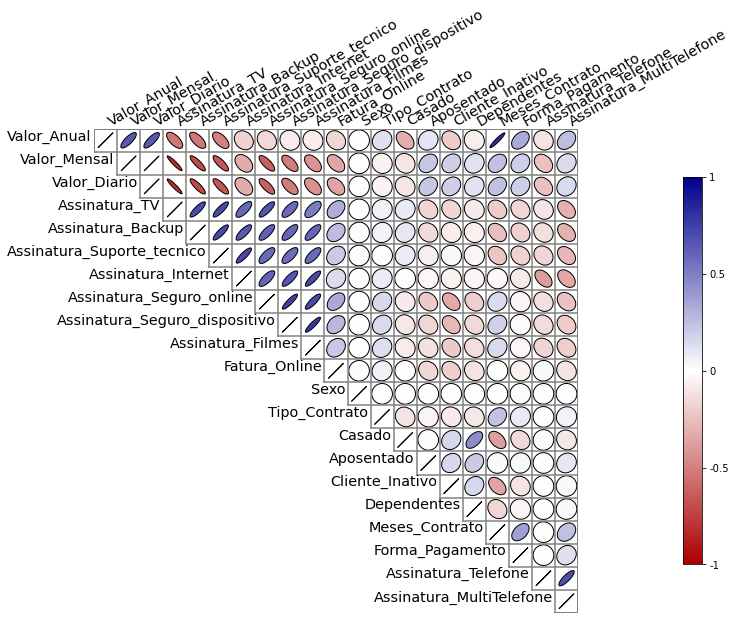

In [122]:
# Avaliando graficamente
matriz_corr = df.corr()
corr_graph = corrplot.Corrplot(matriz_corr)
corr_graph.plot(upper='ellipse',fontsize='x-large')
fig = plt.gcf()
fig.set_size_inches(90,15)

# **4 - Análise gráfica do perfil dos clientes**

## **3.1 - Análise da evasão de clientes**

In [4]:
# Criadno um dataframe temporário para plotar o gráfico de evasão de clientes
df_inativo = df.Cliente_Inativo.value_counts(normalize=True)*100
df_inativo = df_inativo.to_frame().reset_index()
df_inativo.columns = ['Situação do cliente', 'Percentual']
df_inativo['Situação do cliente'] = df_inativo['Situação do cliente'].map({0:'Ativo', 1:'Inativo'})
df_inativo['Percentual'] = df_inativo['Percentual'].round(1)

fig = px.bar(df_inativo, x = df_inativo['Situação do cliente'], y = df_inativo['Percentual'], color = "Situação do cliente", text='Percentual',
    title="Avaliação da taxa de evasão dos clientes")
fig.update_traces(textfont_size=16, textangle=0, textposition="inside", cliponaxis=False, opacity=0.8, marker_line_width=1.5,
    marker_line_color = 'rgb(0,0,0)')
fig.show()

## **3.2 - Perfil de gastos dos clientes**

### **3.2.1 - Perfil de gasto mensal dos clientes**

In [69]:
# Avaliação em relação ao custo mensal do plano
df_gastos = df.Valor_Mensal.value_counts()
df_gastos = df_gastos.to_frame().reset_index()
df_gastos.columns = ['Valor mensal do plano', 'Quantidade']
df_gastos['Situação do cliente'] = df.Cliente_Inativo
df_gastos['Situação do cliente'] = df_gastos['Situação do cliente'].map({0:'Ativo', 1:'Inativo'})


fig = px.histogram(df_gastos, x="Valor mensal do plano", color = "Situação do cliente", nbins = 8,
    title="Situação dos clientes em relação ao custo mensal do plano", histnorm = None, barnorm = 'percent')
fig.update_traces( opacity=0.8, marker_line_width=1.5, marker_line_color = 'rgb(0,0,0)')
fig.update_layout(bargap=0.05)
fig.show()

### **3.2.2 - Perfil de gasto total dos clientes**

In [112]:
# # Avaliação em relação ao custo anual total do plano
df_gastos = df.Valor_Anual.value_counts()
df_gastos = df_gastos.to_frame().reset_index()
df_gastos.columns = ['Valor anual total do plano', 'Quantidade']
df_gastos['Situação do cliente'] = df.Cliente_Inativo
df_gastos['Situação do cliente'] = df_gastos['Situação do cliente'].map({0:'Ativo', 1:'Inativo'})


fig = px.histogram(df_gastos, x="Valor anual total do plano", color = "Situação do cliente", nbins = 10,
    title="Situação dos clientes em relação ao custo anual total do plano", barnorm='percent')
fig.update_traces( opacity=0.8, marker_line_width=1.5, marker_line_color = 'rgb(0,0,0)')
fig.update_layout(bargap=0.05)
fig.show()

### **3.2.3 - Valor médio mensal do contrato por cliente**

In [12]:
# Criando e organizando o dataframe de plotagem
data_aux = df[['Cliente_Inativo', 'Valor_Mensal', 'Valor_Anual']].groupby('Cliente_Inativo').mean().round(2)
data_aux = [ ['Ativo'   , data_aux['Valor_Mensal'][0] , data_aux['Valor_Anual'][0]], 
             ['Inativo' , data_aux['Valor_Mensal'][1] , data_aux['Valor_Anual'][1] ] ]
df_media_gastos = pd.DataFrame(data_aux, columns = ['Situação do cliente', 'Valor mensal médio do plano', 'Valor total médio do plano'])

# Plotando em gráfico de barras
fig = px.bar(df_media_gastos, x = df_media_gastos['Situação do cliente'], y = df_media_gastos['Valor mensal médio do plano'], 
    color = 'Situação do cliente' ,text='Valor mensal médio do plano', title="Índice de cancelamento por valor médio mensal do plano contratado")
fig.update_traces(textfont_size=16, textangle=0, textposition="inside", cliponaxis=False, opacity=0.8, marker_line_width=1.5,
    marker_line_color = 'rgb(0,0,0)')
fig.show()

# Para salvar a imagem
# pio.write_image(fig, 'image.png',scale=6, width=1080, height=1080)

### **3.2.4 - Valor médio anual do contrato por cliente**

In [13]:
# Plotando em gráfico de barras
fig = px.bar(df_media_gastos, x = df_media_gastos['Situação do cliente'], y = df_media_gastos['Valor total médio do plano'], 
    color = 'Situação do cliente' ,text='Valor total médio do plano', title="Índice de cancelamento por valor médio anual do plano contratado")
fig.update_traces(textfont_size=16, textangle=0, textposition="inside", cliponaxis=False, opacity=0.8, marker_line_width=1.5,
    marker_line_color = 'rgb(0,0,0)')
fig.show()

## **3.3 - Tempo de contrato**

### **3.3.1 - Tempo total de contrato**

In [76]:
# Dataframe de plotagem
df_contrato = df.Meses_Contrato.value_counts()
df_contrato = df_contrato.to_frame().reset_index()
df_contrato.columns = ['Duração do plano', 'Quantidade']
df_contrato['Situação do cliente'] = df.Cliente_Inativo
df_contrato['Situação do cliente'] = df_contrato['Situação do cliente'].map({0:'Ativo', 1:'Inativo'})

# Plotagem do histograma
fig = px.histogram(df_contrato, x="Duração do plano", color = "Situação do cliente", nbins = 5,
    title="Situação dos clientes em relação à duração do contrato", barnorm='percent')
fig.update_traces( opacity=0.8, marker_line_width=1.5, marker_line_color = 'rgb(0,0,0)')
fig.update_layout(bargap=0.05)
fig.show()

### **3.3.2 - Primeiro ano de contrato**

In [94]:
import plotly.graph_objects as go

In [98]:
# Avaliando somente os clientes com 1 e 2 anos de contrato
clientes_1y = df.query('Meses_Contrato <= 12')
clientes_1y = clientes_1y[['Cliente_Inativo','Meses_Contrato','Valor_Mensal','Valor_Anual']]
clientes_1y.columns = ['Situação do cliente','Duração do plano', 'Valor mensal do plano','Valor anual do plano']
clientes_1y['Situação do cliente'] = clientes_1y['Situação do cliente'].map({0:'Ativo', 1:'Inativo'})
clientes_1y.head(2)

,Situação do cliente,Duração do plano,Valor mensal do plano,Valor anual do plano
0,Ativo,9,65.6,593.3
1,Ativo,9,59.9,542.4


In [111]:
fig = px.scatter(clientes_1y, x="Duração do plano", y="Valor mensal do plano", color="Situação do cliente",
                size = 'Duração do plano'
    )
fig.show()

In [108]:
# Avaliando somente os clientes com 1 e 2 anos de contrato
clientes_1y = df.query('Meses_Contrato <= 12')
clientes_1y = clientes_1y[['Cliente_Inativo','Meses_Contrato','Valor_Mensal','Valor_Anual']]
clientes_1y.columns = ['Situação do cliente','Duração do plano', 'Valor mensal do plano','Valor anual do plano']
clientes_1y['Situação do cliente'] = clientes_1y['Situação do cliente'].map({0:'Ativo', 1:'Inativo'})

# Plotando
fig = px.histogram(clientes_1y, x="Duração do plano", color = "Situação do cliente", nbins = 12,
    title="Situação dos clientes em relação à duração do contrato", barnorm='percent')
fig.update_traces( opacity=0.8, marker_line_width=1.5, marker_line_color = 'rgb(0,0,0)')
fig.update_layout(bargap=0.05)
fig.show()

In [83]:
df.query('Meses_Contrato <= 12')

,Cliente_Inativo,Sexo,Aposentado,Casado,Dependentes,Meses_Contrato,Assinatura_Telefone,Assinatura_MultiTelefone,Assinatura_Internet,Assinatura_Seguro_online,...,Assinatura_Seguro_dispositivo,Assinatura_Suporte_tecnico,Assinatura_TV,Assinatura_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Valor_Mensal,Valor_Diario,Valor_Anual
0,0,0,0,0,0,9,0,0,0,0,...,0,0,0,0,0,0,0,65.60,2.186667,593.30
1,0,1,0,1,1,9,0,1,0,0,...,0,1,1,1,1,1,0,59.90,1.996667,542.40
2,1,1,0,1,1,4,0,0,1,0,...,1,1,1,0,1,0,1,73.90,2.463333,280.85
4,1,0,1,0,1,3,0,0,1,0,...,0,0,0,0,1,0,0,83.90,2.796667,267.40
5,0,0,0,1,0,9,0,0,0,0,...,0,0,0,1,1,0,2,69.40,2.313333,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0,1,0,1,1,1,0,0,2,2,...,2,2,2,2,1,1,0,18.90,0.630000,18.90
7024,0,0,0,1,1,7,0,0,1,0,...,0,1,0,1,0,0,0,94.05,3.135000,633.45
7025,1,0,0,1,1,1,0,0,1,0,...,0,1,1,0,1,0,0,70.15,2.338333,70.15
7026,1,0,0,1,1,4,0,0,2,2,...,2,2,2,2,1,1,3,20.95,0.698333,85.50
